<a href="https://colab.research.google.com/github/DanielGreiner/Masterarbeit/blob/main/Isothermal_steady_state_1D_PFR_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text

# Introcode



# Load libraries

In [ ]:
# @title import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as to
import scipy as sc

In [ ]:
# @title check library versions
print("tensorflow:" + str(tf.__version__))
print("numpy:" + str(np.__version__))
print("pandas:" + str(pd.__version__))
print("torch:" + str(to.__version__))
print("scipy:" + str(sc.__version__))

tensorflow:2.13.0
numpy:1.23.5
pandas:1.5.3
torch:2.0.1+cu118
scipy:1.10.1


# Code Setup

In [ ]:
from numpy.lib.nanfunctions import nanprod
# @title Konstanten laden
k = 1
u = 1.500
A = 3*10**-3
v = u*A
Vges = 0.015
steps = 1000
dV = Vges/steps
z = Vges/A
r = np.sqrt(A/3.14)
# print (steps)
# print (dV)
print (v)
print (z)
print (r)

0.0045000000000000005
5.0
0.030909772123696635


In [ ]:
# @title Startwerte
t0 = 0
z0 = 0
V0 = 0
T0 = 298
cA0 = 2

# PFTR Isotherm Stationär

ODE: $\frac{dc_A}{dz}$=-$\frac{1}{u_0}$⋅k⋅$c_A$

$\frac{dc_A}{dV}$=-$\frac{1}{V.}$⋅k⋅$c_A$

cA =0.07095182985399444
V =0.014999999999999753
[[ 0.          2.        ]
 [ 0.015       1.99333333]
 [ 0.03        1.98668889]
 ...
 [14.97        0.07142722]
 [14.985       0.07118913]
 [15.          0.07095183]]


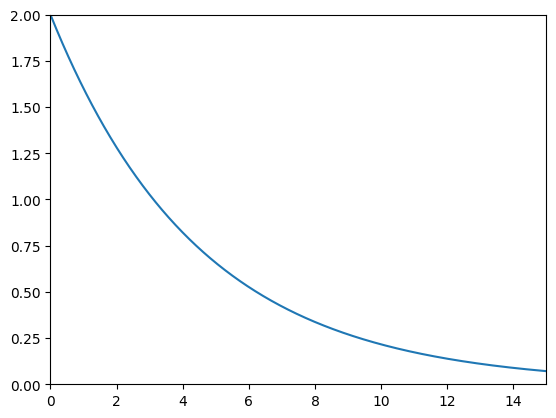

In [ ]:
# @title Euler Verfahren manuell
#def Euler(ca0, V0, steps)
V = V0
cA = cA0
cAtemp = cA0
res = np.zeros((steps+1, 2))
res[0,0] = V0
res[0,1] = cA0

for i in range(steps):
  cA = cAtemp - (1/v)*k*cAtemp*dV
  cAtemp = cA
  V = V + dV
  res[i+1,0] = V*1000
  res[i+1,1] = cA

plt.plot(res[:,0],res[:,1])
plt.axis((0, 15, 0, 2))
print("cA ="+ str(cA))
print("V ="+ str(V))
print(res)

In [ ]:
# @title Berechnung mittels Euler


In [ ]:
# @title Berechnung mittels ODE-Solver